# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import pearsonr

# Study data files
Mouse_metadata = pd.read_csv(r"C:\Users\Owner\Desktop\home work\Module5\Matplotlib\Mouse_metadata.csv")
Study_results = pd.read_csv(r"C:\Users\Owner\Desktop\home work\Module5\Matplotlib\Study_results.csv")
# Read the mouse data and the study results
#mouse_metadata = pd.read_csv(mouse_metadata_path)
#study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
df = pd.merge ( Study_results, Mouse_metadata,  how= 'right', on = 'Mouse ID') 
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16


In [2]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows = df[df.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
909,g989,0,45.000000,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_info = df.loc[df["Mouse ID"] =="g989"]
duplicate_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df= df.loc[df["Mouse ID"] !="g989"]
df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,0,45.000000,0,Ramicane,Male,21,16
1,k403,5,38.825898,0,Ramicane,Male,21,16
2,k403,10,35.014271,1,Ramicane,Male,21,16
3,k403,15,34.223992,1,Ramicane,Male,21,16
4,k403,20,32.997729,1,Ramicane,Male,21,16
...,...,...,...,...,...,...,...,...
1888,z969,25,63.145652,2,Naftisol,Male,9,30
1889,z969,30,65.841013,3,Naftisol,Male,9,30
1890,z969,35,69.176246,4,Naftisol,Male,9,30
1891,z969,40,70.314904,4,Naftisol,Male,9,30


In [6]:
# Checking the number of mice in the clean DataFrame.
df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor = Mouse_metadata['Drug Regimen']
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
df_mean=df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
df_median=df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
df_var=df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
df_std=df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
df_sem=df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
summary_df=pd.DataFrame({
    "Mean Tumor Volume":df_mean,
    "Median Tumor Volume":df_median,
    "Tumor Volume Variance":df_var,
    "Tumor Volume Std. Dev.":df_std,
    "Tumor Volume Std. Err.":df_sem 
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
Tumor_Volume= df.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
Tumor_Volume.head()


C:\Users\Owner\AppData\Local\Temp\ipykernel_13300\2591915645.py:5: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  Tumor_Volume= df.groupby('Drug Regimen').agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Text(0, 0.5, 'number of mice tested')

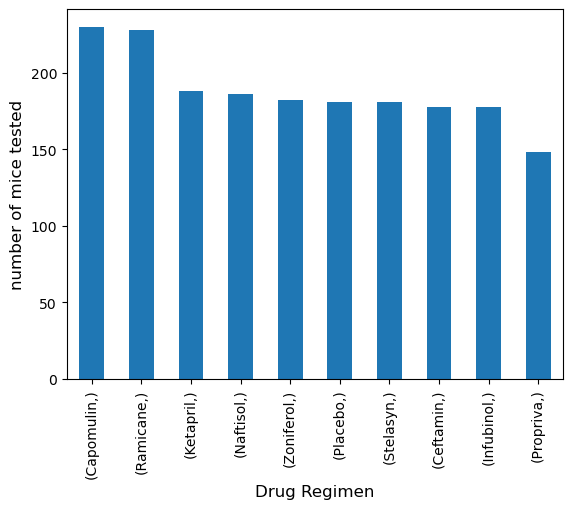

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Timepoints = df.value_counts(['Drug Regimen']).plot(kind='bar')
Timepoints.plot(kind='bar') 

plt.xlabel("Drug Regimen", fontsize = 12)
plt.ylabel("number of mice tested", fontsize =12)


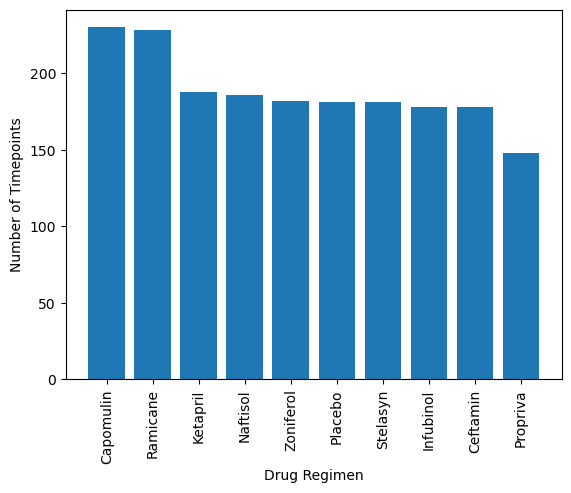

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Timepoint = df ['Drug Regimen'].value_counts()
Timepoint.values
#Timepoint = df.sort_values(ascending=False) # sorted values
plt.bar(Timepoint.index, Timepoint.values) # used pyplot function
plt.ylabel('Number of Timepoints', size=10) # define y label
plt.xlabel('Drug Regimen') # define x label
plt.xticks(rotation='vertical') # this is to rotate the x values
plt.show()


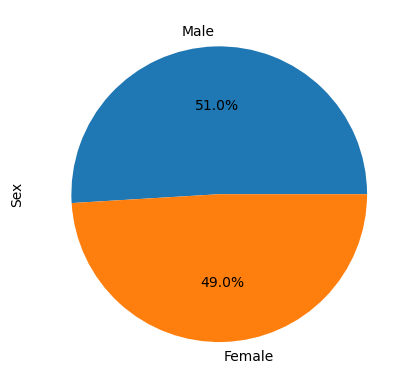

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gender = df['Sex'].value_counts()
Gender.plot(kind='pie',autopct='%1.1f%%')
plt.show()

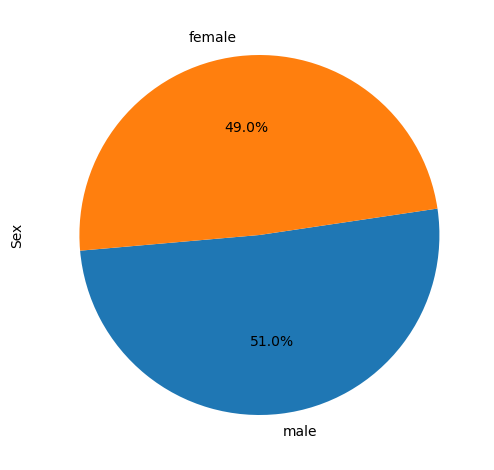

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(Gender, labels=('male', 'female'), startangle=185, autopct='%1.1f%%')
plt.ylabel('Sex') 
plt.tight_layout()
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

last_tm_df =df.groupby(['Mouse ID']).max()[['Timepoint']].reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tm_df = pd.merge(df,last_tm_df, on=('Mouse ID', 'Timepoint'), how='right')
last_tm_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]



# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for value in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    row=df.loc[df["Drug Regimen"]== value]['Tumor Volume (mm3)']
        
    # add subset 
    tumor_vol_data.append(row)
    
    # Determine outliers using upper and lower bounds
    quartiles = row. quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25] 
    upperq = quartiles[0.75]
    iqr = quartiles[0.75] - quartiles[0.25]
    lowerbound = lowerq - (1.5 * iqr)
    upperbound = upperq + (1.5 *iqr)
    print(f"{value}: below { lowerbound} or above{upperbound} can be outliers")
    print(row[(row<lowerbound)|(row>upperbound)])
    

Capomulin: below 26.714832162499995 or above55.9711007025 can be outliers
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane: below 24.1865864625 or above57.488048122500004 can be outliers
9    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol: below 32.309217298749985 or above72.31757996875001 can be outliers
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin: below 32.81891142624998 or above71.19095325625001 can be outliers
Series([], Name: Tumor Volume (mm3), dtype: float64)


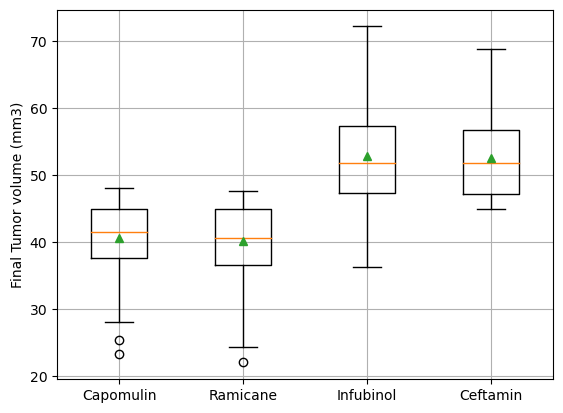

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels = treatments, showmeans = True)
plt.ylabel('Final Tumor volume (mm3)')
plt.grid()
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

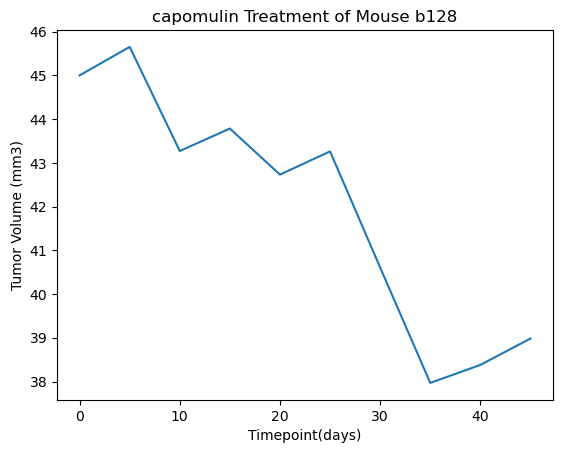

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mouse = df.loc[df["Mouse ID"] == "b128",:]
plt.plot(cap_mouse["Timepoint"],cap_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint(days)")
plt.title("capomulin Treatment of Mouse b128")
plt.ylabel("Tumor Volume (mm3)")
plt.show


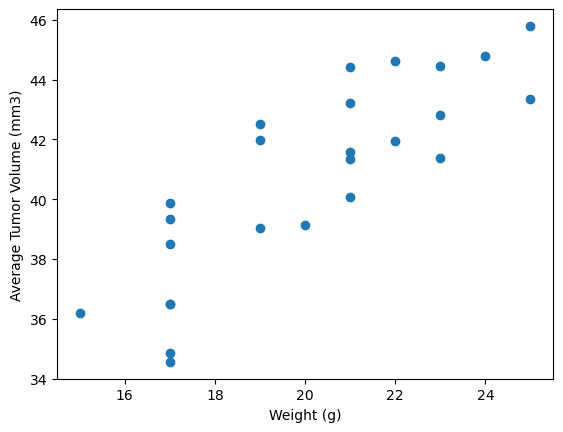

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap = df.loc[df["Drug Regimen"] == "Capomulin"]
cap_avg= cap.groupby(["Mouse ID"]).mean ()
plt.scatter(cap_avg['Weight (g)'],cap_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
cap = df.loc[df["Drug Regimen"] =="Capomulin"] 
cap_avg = cap.groupby(["Mouse ID"]).mean()
correlation = set.pearsonr(cap_avg['Weight (g)'],cap_avg['Tumor Volume(mm3)'])
print (f"The correlation between mouse weight and average tumor volume is {round( correlation[0],2)})")
x_values = cap_avg['Weight (g)'] #plt.plot(cap_avg['Weight (g)']
y_values = cap_avg['Tumor Volume (mm3)']
cap_slope, cap_int, cap_r,cap_p, cap_std_err = st.linregress(cap_avg['Weight (g)'], cap_avg['Tumor Volume (mm3)'])
line, r, label='y={:.2f}x+{:.2f}'.format(slope,intercept)
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')
plt.legend()
plt.savefig('linearregression')
plt.show()


AttributeError: type object 'set' has no attribute 'pearsonr'